In [1]:

import warnings
warnings.filterwarnings('ignore')
warnings.filterwarnings("ignore",category=DeprecationWarning)
import numpy as np
import pandas as pd
import nltk
import re, os
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn import decomposition
from sklearn.feature_extraction.text import TfidfVectorizer
import matplotlib.pyplot as plt
import seaborn as sns



In [2]:
import pandas as pd
pd.set_option('display.max_colwidth', 100)

df = pd.read_csv('imdb_labelled.txt', sep='\t', header=None)
df.columns = ['body_text','label']

df.head()

,body_text,label
0,"A very, very, very slow-moving, aimless movie about a distressed, drifting young man.",0
1,"Not sure who was more lost - the flat characters or the audience, nearly half of whom walked out.",0
2,"Attempting artiness with black & white and clever camera angles, the movie disappointed - became...",0
3,Very little music or anything to speak of.,0
4,The best scene in the movie was when Gerardo is trying to find a song that keeps running through...,1


In [6]:
df.shape

(748, 2)

In [7]:
df1 = df.dropna()

In [9]:
df1.shape

(748, 2)

In [11]:
df1['count'] = df1['body_text'].apply(lambda x: len(x.split()))

<Figure size 800x800 with 0 Axes>

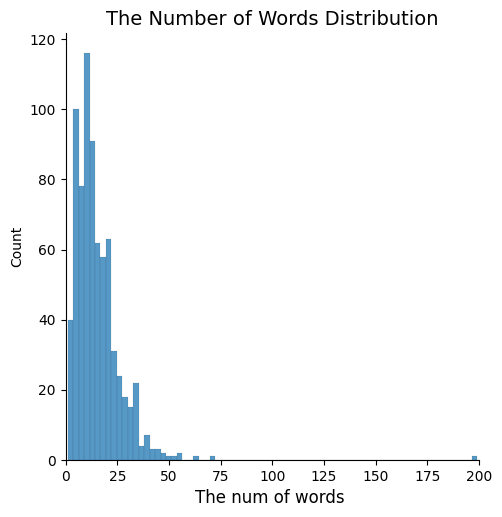

In [16]:
plt.figure(figsize= (8, 8))

sns.displot(df1['count'])

plt.xlim(0, 200)

plt.xlabel('The num of words ', fontsize = 12)
plt.title("The Number of Words Distribution", fontsize = 14)
plt.show()

In [17]:
category_count = df1['label'].value_counts()

categories = category_count.index

categories

Int64Index([1, 0], dtype='int64')

In [19]:
category_count

1    386
0    362
Name: label, dtype: int64

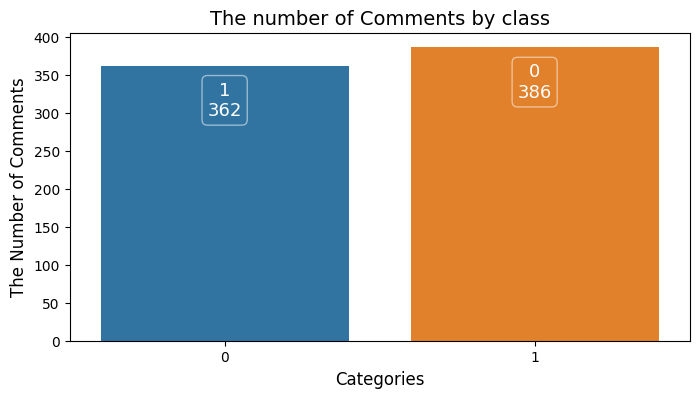

In [21]:
fig = plt.figure(figsize= (8, 4))

ax = fig.add_subplot(111)

sns.barplot(x = category_count.index, y = category_count )

for a, p in enumerate(ax.patches):
    ax.annotate(f'{categories[a]}\n' + format(p.get_height(), '.0f'), xy = (p.get_x() + p.get_width() / 2.0, p.get_height()), xytext = (0,-25), size = 13, color = 'white' , ha = 'center', va = 'center', textcoords = 'offset points', bbox = dict(boxstyle = 'round', facecolor='none',edgecolor='white', alpha = 0.5) )
    
plt.xlabel('Categories', size = 12)

plt.ylabel('The Number of Comments', size= 12)

plt.xticks(size = 10)

plt.title("The number of Comments by class" , size = 14)

plt.show()

## Preprocessing

In [23]:
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import gensim

In [26]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [27]:
def remove_punct(text):
    text_nopunct = "".join ([char for char in text if char not in string.punctuation]) 
    return text_nopunct

df ["body_text_clean"]= df["body_text"].apply(lambda x:remove_punct(x))
df.head()

,body_text,label,body_text_clean
0,"A very, very, very slow-moving, aimless movie about a distressed, drifting young man.",0,A very very very slowmoving aimless movie about a distressed drifting young man
1,"Not sure who was more lost - the flat characters or the audience, nearly half of whom walked out.",0,Not sure who was more lost the flat characters or the audience nearly half of whom walked out
2,"Attempting artiness with black & white and clever camera angles, the movie disappointed - became...",0,Attempting artiness with black white and clever camera angles the movie disappointed became ev...
3,Very little music or anything to speak of.,0,Very little music or anything to speak of
4,The best scene in the movie was when Gerardo is trying to find a song that keeps running through...,1,The best scene in the movie was when Gerardo is trying to find a song that keeps running through...


In [28]:
import re
def tokenize(text):
    tokens= re.split("\W+",text)
    return tokens

df["body_text_tokenized"]=df ["body_text_clean"].apply(lambda x:tokenize(x.lower()))
df.head()

,body_text,label,body_text_clean,body_text_tokenized
0,"A very, very, very slow-moving, aimless movie about a distressed, drifting young man.",0,A very very very slowmoving aimless movie about a distressed drifting young man,"[a, very, very, very, slowmoving, aimless, movie, about, a, distressed, drifting, young, man, ]"
1,"Not sure who was more lost - the flat characters or the audience, nearly half of whom walked out.",0,Not sure who was more lost the flat characters or the audience nearly half of whom walked out,"[not, sure, who, was, more, lost, the, flat, characters, or, the, audience, nearly, half, of, wh..."
2,"Attempting artiness with black & white and clever camera angles, the movie disappointed - became...",0,Attempting artiness with black white and clever camera angles the movie disappointed became ev...,"[attempting, artiness, with, black, white, and, clever, camera, angles, the, movie, disappointed..."
3,Very little music or anything to speak of.,0,Very little music or anything to speak of,"[very, little, music, or, anything, to, speak, of, ]"
4,The best scene in the movie was when Gerardo is trying to find a song that keeps running through...,1,The best scene in the movie was when Gerardo is trying to find a song that keeps running through...,"[the, best, scene, in, the, movie, was, when, gerardo, is, trying, to, find, a, song, that, keep..."


In [29]:
import nltk

stopword= nltk.corpus.stopwords.words("english")

In [30]:
def remove_stopwords(tokenized_list):
    text =[word for word in tokenized_list if word not in stopword]
    return text

df["body_text_nostop"] = df["body_text_tokenized"].apply(lambda x:remove_stopwords(x))

In [31]:
df.head()

,body_text,label,body_text_clean,body_text_tokenized,body_text_nostop
0,"A very, very, very slow-moving, aimless movie about a distressed, drifting young man.",0,A very very very slowmoving aimless movie about a distressed drifting young man,"[a, very, very, very, slowmoving, aimless, movie, about, a, distressed, drifting, young, man, ]","[slowmoving, aimless, movie, distressed, drifting, young, man, ]"
1,"Not sure who was more lost - the flat characters or the audience, nearly half of whom walked out.",0,Not sure who was more lost the flat characters or the audience nearly half of whom walked out,"[not, sure, who, was, more, lost, the, flat, characters, or, the, audience, nearly, half, of, wh...","[sure, lost, flat, characters, audience, nearly, half, walked, ]"
2,"Attempting artiness with black & white and clever camera angles, the movie disappointed - became...",0,Attempting artiness with black white and clever camera angles the movie disappointed became ev...,"[attempting, artiness, with, black, white, and, clever, camera, angles, the, movie, disappointed...","[attempting, artiness, black, white, clever, camera, angles, movie, disappointed, became, even, ..."
3,Very little music or anything to speak of.,0,Very little music or anything to speak of,"[very, little, music, or, anything, to, speak, of, ]","[little, music, anything, speak, ]"
4,The best scene in the movie was when Gerardo is trying to find a song that keeps running through...,1,The best scene in the movie was when Gerardo is trying to find a song that keeps running through...,"[the, best, scene, in, the, movie, was, when, gerardo, is, trying, to, find, a, song, that, keep...","[best, scene, movie, gerardo, trying, find, song, keeps, running, head, ]"


In [ ]:
##Stemming

In [32]:
#importing the Stemming function from nltk library
from nltk.stem.porter import PorterStemmer
#defining the object for stemming
porter_stemmer = PorterStemmer()

In [33]:
#defining a function for stemming
def stemming(text):
    stem_text = [porter_stemmer.stem(word) for word in text]
    return stem_text
df['text_stemmed']=df['body_text_nostop'].apply(lambda x: stemming(x))

In [34]:
df.head()

,body_text,label,body_text_clean,body_text_tokenized,body_text_nostop,text_stemmed
0,"A very, very, very slow-moving, aimless movie about a distressed, drifting young man.",0,A very very very slowmoving aimless movie about a distressed drifting young man,"[a, very, very, very, slowmoving, aimless, movie, about, a, distressed, drifting, young, man, ]","[slowmoving, aimless, movie, distressed, drifting, young, man, ]","[slowmov, aimless, movi, distress, drift, young, man, ]"
1,"Not sure who was more lost - the flat characters or the audience, nearly half of whom walked out.",0,Not sure who was more lost the flat characters or the audience nearly half of whom walked out,"[not, sure, who, was, more, lost, the, flat, characters, or, the, audience, nearly, half, of, wh...","[sure, lost, flat, characters, audience, nearly, half, walked, ]","[sure, lost, flat, charact, audienc, nearli, half, walk, ]"
2,"Attempting artiness with black & white and clever camera angles, the movie disappointed - became...",0,Attempting artiness with black white and clever camera angles the movie disappointed became ev...,"[attempting, artiness, with, black, white, and, clever, camera, angles, the, movie, disappointed...","[attempting, artiness, black, white, clever, camera, angles, movie, disappointed, became, even, ...","[attempt, arti, black, white, clever, camera, angl, movi, disappoint, becam, even, ridicul, act,..."
3,Very little music or anything to speak of.,0,Very little music or anything to speak of,"[very, little, music, or, anything, to, speak, of, ]","[little, music, anything, speak, ]","[littl, music, anyth, speak, ]"
4,The best scene in the movie was when Gerardo is trying to find a song that keeps running through...,1,The best scene in the movie was when Gerardo is trying to find a song that keeps running through...,"[the, best, scene, in, the, movie, was, when, gerardo, is, trying, to, find, a, song, that, keep...","[best, scene, movie, gerardo, trying, find, song, keeps, running, head, ]","[best, scene, movi, gerardo, tri, find, song, keep, run, head, ]"


In [35]:
from nltk.stem import WordNetLemmatizer
#defining the object for Lemmatization
wordnet_lemmatizer = WordNetLemmatizer()

In [36]:
#defining the function for lemmatization
def lemmatizer(text):
    lemm_text = [wordnet_lemmatizer.lemmatize(word) for word in text]
    return lemm_text
df['msg_lemmatized']=df['body_text_nostop'].apply(lambda x:lemmatizer(x))

In [37]:
df.head()

,body_text,label,body_text_clean,body_text_tokenized,body_text_nostop,text_stemmed,msg_lemmatized
0,"A very, very, very slow-moving, aimless movie about a distressed, drifting young man.",0,A very very very slowmoving aimless movie about a distressed drifting young man,"[a, very, very, very, slowmoving, aimless, movie, about, a, distressed, drifting, young, man, ]","[slowmoving, aimless, movie, distressed, drifting, young, man, ]","[slowmov, aimless, movi, distress, drift, young, man, ]","[slowmoving, aimless, movie, distressed, drifting, young, man, ]"
1,"Not sure who was more lost - the flat characters or the audience, nearly half of whom walked out.",0,Not sure who was more lost the flat characters or the audience nearly half of whom walked out,"[not, sure, who, was, more, lost, the, flat, characters, or, the, audience, nearly, half, of, wh...","[sure, lost, flat, characters, audience, nearly, half, walked, ]","[sure, lost, flat, charact, audienc, nearli, half, walk, ]","[sure, lost, flat, character, audience, nearly, half, walked, ]"
2,"Attempting artiness with black & white and clever camera angles, the movie disappointed - became...",0,Attempting artiness with black white and clever camera angles the movie disappointed became ev...,"[attempting, artiness, with, black, white, and, clever, camera, angles, the, movie, disappointed...","[attempting, artiness, black, white, clever, camera, angles, movie, disappointed, became, even, ...","[attempt, arti, black, white, clever, camera, angl, movi, disappoint, becam, even, ridicul, act,...","[attempting, artiness, black, white, clever, camera, angle, movie, disappointed, became, even, r..."
3,Very little music or anything to speak of.,0,Very little music or anything to speak of,"[very, little, music, or, anything, to, speak, of, ]","[little, music, anything, speak, ]","[littl, music, anyth, speak, ]","[little, music, anything, speak, ]"
4,The best scene in the movie was when Gerardo is trying to find a song that keeps running through...,1,The best scene in the movie was when Gerardo is trying to find a song that keeps running through...,"[the, best, scene, in, the, movie, was, when, gerardo, is, trying, to, find, a, song, that, keep...","[best, scene, movie, gerardo, trying, find, song, keeps, running, head, ]","[best, scene, movi, gerardo, tri, find, song, keep, run, head, ]","[best, scene, movie, gerardo, trying, find, song, keep, running, head, ]"


## Topic Extraction